In [1]:
# Import packages
import matplotlib.pyplot as plt
from pandas_datareader import data
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Define the cost function
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [4]:
# Queries Yahoo Finance API for GOOG stock price data
tickers = ['GOOG']
data_source = 'yahoo'
start_date = '2014-10-06'
end_date = '2017-10-06'
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [5]:
open = panel_data.loc['Open']
high = panel_data.loc['High']
low = panel_data.loc['Low']
close = panel_data.loc['Close']

In [6]:
#Adj Close prices have already been adjusted by Yahoo finance
# to account for corporate actions such as dividends and stock splits.
adj_close = panel_data.loc['Adj Close']
adj_close.head(10)

,GOOG
Date,
2017-10-06,978.890015
2017-10-05,969.960022
2017-10-04,951.679993
2017-10-03,957.789978
2017-10-02,953.270020
2017-09-29,959.109985
2017-09-28,949.500000
2017-09-27,944.489990
2017-09-26,924.859985


In [7]:
# Getting all weekdays between 10/06/2014 and 10/06/2017
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Align the existing prices in adj_close with our new set of dates
adj_close = adj_close.reindex(all_weekdays)

# Imputation using the latest available price for each instrument
adj_close = adj_close.fillna(method='ffill')

adj_close.head(10)

,GOOG
2014-10-06,574.192749
2014-10-07,560.657227
2014-10-08,569.369324
2014-10-09,557.812866
2014-10-10,541.512451
2014-10-13,530.294128
2014-10-14,534.998291
2014-10-15,527.131531
2014-10-16,521.641724
2014-10-17,508.374695


In [8]:
# Calculate the Log price changes
log_returns = np.log(adj_close).diff()
log_returns.head(10)

,GOOG
2014-10-06,NaN
2014-10-07,-0.023855
2014-10-08,0.015420
2014-10-09,-0.020506
2014-10-10,-0.029657
2014-10-13,-0.020934
2014-10-14,0.008832
2014-10-15,-0.014813
2014-10-16,-0.010469
2014-10-17,-0.025762


In [9]:
# Calculate the 7 days rolling sum of the log price changes
RollingSum_LogReturn = log_returns.rolling(window=7).sum()
RollingSum_LogReturn.head(20)

,GOOG
2014-10-06,NaN
2014-10-07,NaN
2014-10-08,NaN
2014-10-09,NaN
2014-10-10,NaN
2014-10-13,NaN
2014-10-14,NaN
2014-10-15,-0.085515
2014-10-16,-0.072129
2014-10-17,-0.113311


In [10]:
# Fill the rolling sum of the log price changes of the first 7 days using the 8th days data for consistency
RollingSum_LogReturn = RollingSum_LogReturn.fillna(-0.085515)
RollingSum_LogReturn.head(20)

,GOOG
2014-10-06,-0.085515
2014-10-07,-0.085515
2014-10-08,-0.085515
2014-10-09,-0.085515
2014-10-10,-0.085515
2014-10-13,-0.085515
2014-10-14,-0.085515
2014-10-15,-0.085515
2014-10-16,-0.072129
2014-10-17,-0.113311


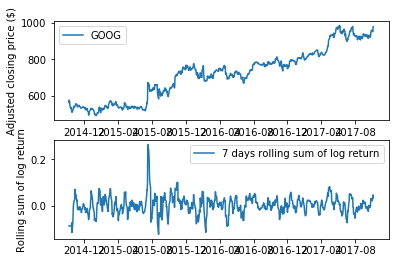

In [11]:
# Plot the adjusted close price and rolling sum of the log price changes respectively
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(adj_close.index, adj_close, label='GOOG')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend(loc='best')

ax = fig.add_subplot(2,1,2)
ax.plot(RollingSum_LogReturn.index, RollingSum_LogReturn, label='7 days rolling sum of log return')
ax.set_ylabel('Rolling sum of log return')
ax.legend(loc='best')

plt.show()

In [12]:
# Calculate the z-scores for rolling sum of log price changes
z_scores = stats.zscore(RollingSum_LogReturn["GOOG"])
z_scores

array([ -2.36747454e+00,  -2.36747454e+00,  -2.36747454e+00,
        -2.36747454e+00,  -2.36747454e+00,  -2.36747454e+00,
        -2.36747454e+00,  -2.36747553e+00,  -2.01408594e+00,
        -3.10125732e+00,  -2.06517842e+00,  -9.94901033e-01,
        -1.34704084e-01,   1.84821517e-01,   3.71271219e-01,
         6.96020947e-01,   1.77006386e+00,   1.29599373e+00,
         1.05570877e+00,   1.16555627e+00,   4.29978929e-01,
         5.81765801e-01,   1.40284454e-01,  -4.41949351e-01,
        -5.12832084e-01,  -2.45565341e-01,  -5.28292636e-01,
        -4.88741099e-01,  -5.29172662e-01,  -1.83542383e-01,
        -3.80652126e-01,  -4.03366196e-01,  -6.21155527e-01,
        -8.62226639e-01,  -5.87414617e-01,  -4.07361416e-01,
        -2.71427700e-01,   7.93144333e-02,   1.52240233e-01,
         1.26938575e-01,  -1.60827317e-01,  -2.94764669e-01,
        -5.02019222e-01,  -2.94517499e-01,  -8.58639747e-01,
        -7.72335758e-01,  -5.25380069e-01,  -4.95526189e-01,
        -3.78880003e-01,

In [13]:
# Construct a dataframe for z-scores using ndarray z_scores
DF_zScore = pd.DataFrame(z_scores, RollingSum_LogReturn.index, columns=["Z scores"])
DF_zScore.head(20)

,Z scores
2014-10-06,-2.367475
2014-10-07,-2.367475
2014-10-08,-2.367475
2014-10-09,-2.367475
2014-10-10,-2.367475
2014-10-13,-2.367475
2014-10-14,-2.367475
2014-10-15,-2.367476
2014-10-16,-2.014086
2014-10-17,-3.101257


In [14]:
# Round the z-scores to the nearest integers
DF_zScore["Z-scores"] = DF_zScore["Z scores"].apply(lambda x: int(round(x)))
DF_zScore.head(20)

,Z scores,Z-scores
2014-10-06,-2.367475,-2
2014-10-07,-2.367475,-2
2014-10-08,-2.367475,-2
2014-10-09,-2.367475,-2
2014-10-10,-2.367475,-2
2014-10-13,-2.367475,-2
2014-10-14,-2.367475,-2
2014-10-15,-2.367476,-2
2014-10-16,-2.014086,-2
2014-10-17,-3.101257,-3


In [15]:
# Add a column to the dataframe and record the result if a z-score is bigger than 2
DF_zScore["Above two std"] = 0
DF_zScore["Above two std"] = DF_zScore["Z scores"].apply(lambda x: 1 if x > 2 else 0)
DF_zScore.head(20)

,Z scores,Z-scores,Above two std
2014-10-06,-2.367475,-2,0
2014-10-07,-2.367475,-2,0
2014-10-08,-2.367475,-2,0
2014-10-09,-2.367475,-2,0
2014-10-10,-2.367475,-2,0
2014-10-13,-2.367475,-2,0
2014-10-14,-2.367475,-2,0
2014-10-15,-2.367476,-2,0
2014-10-16,-2.014086,-2,0
2014-10-17,-3.101257,-3,0


In [16]:
# Check the sum of the column to see how many z-scores are there which are above 2 standard deviations
print("The number of log return rolling sums that exceed 2 standard deviations:", DF_zScore["Above two std"].sum())

The number of log return rolling sums that exceed 2 standard deviations: 12
